<a href="https://colab.research.google.com/github/rieko-shinji-shibainu/Data-Science/blob/main/%E9%98%AA%E7%A5%9E%E3%82%BF%E3%82%A4%E3%82%AC%E3%83%BC%E3%82%B9%E3%81%A7%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B5%E3%82%A4%E3%82%A8%E3%83%B3%E3%82%B9%E3%82%B5%E3%82%A4%E3%82%AF%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pandasをインポート
import pandas as pd

In [ ]:
# サイトURLを変数に読み込む
url = 'https://nf3.sakura.ne.jp/Central/T/t/fp_all_data_vsS.htm'

In [ ]:
# read_htmlでテーブルを読み込む
data = pd.read_html(url, header = 0)

In [ ]:
raw_data = data[0]
raw_data.head()

,背番,名前,席,通算,通算.1,通算.2,通算.3,通算.4,甲子園,甲子園.1,...,バンテリンドーム,バンテリンドーム.1,バンテリンドーム.2,バンテリンドーム.3,バンテリンドーム.4,その他,その他.1,その他.2,その他.3,その他.4
0,背番,名前,席,試合,打率,本塁,打点,盗塁,試合,打率,...,試合,打率,本塁,打点,盗塁,試合,打率,本塁,打点,盗塁
1,合計,合計,合計,143,.242,67,470,41,62,.258,...,12,.232,2,47,7,2,.194,0,2,1
2,0,木浪聖也,左,116,.214,1,35,1,49,.267,...,9,.160,0,1,0,1,.000,0,0,0
3,1,森下翔太,右,129,.275,16,73,0,57,.304,...,8,.125,0,0,0,2,.429,0,0,0
4,2,梅野隆太郎,右,95,.209,0,15,0,41,.223,...,8,.286,0,3,0,1,.000,0,0,0


### データの加工

In [ ]:
# 必要な列だけ取り出す
selected_columns = ['名前','甲子園.1','マツダスタジアム.1', '横浜.1', '東京ドーム.1', '神宮.1', 'バンテリンドーム.1', 'その他.1']
selected_data = raw_data[selected_columns]
selected_data.head()

,名前,甲子園.1,マツダスタジアム.1,横浜.1,東京ドーム.1,神宮.1,バンテリンドーム.1,その他.1
0,名前,打率,打率,打率,打率,打率,打率,打率
1,合計,.258,.228,.241,.209,.251,.232,.194
2,木浪聖也,.267,.172,.159,.182,.182,.160,.000
3,森下翔太,.304,.205,.263,.219,.410,.125,.429
4,梅野隆太郎,.223,.105,.286,.179,.167,.286,.000


In [ ]:
# 列名の変更
new_column_name = ['選手名','甲子園','マツダスタジアム', '横浜', '東京ドーム', '神宮', 'バンテリンドーム', 'その他']
selected_data.columns = new_column_name
selected_data.head()

,選手名,甲子園,マツダスタジアム,横浜,東京ドーム,神宮,バンテリンドーム,その他
0,名前,打率,打率,打率,打率,打率,打率,打率
1,合計,.258,.228,.241,.209,.251,.232,.194
2,木浪聖也,.267,.172,.159,.182,.182,.160,.000
3,森下翔太,.304,.205,.263,.219,.410,.125,.429
4,梅野隆太郎,.223,.105,.286,.179,.167,.286,.000


In [ ]:
# 1-2行目を削除
drop_1row = selected_data.drop([0,1])
drop_1row.head()

,選手名,甲子園,マツダスタジアム,横浜,東京ドーム,神宮,バンテリンドーム,その他
2,木浪聖也,.267,.172,.159,.182,.182,.160,.000
3,森下翔太,.304,.205,.263,.219,.410,.125,.429
4,梅野隆太郎,.223,.105,.286,.179,.167,.286,.000
5,大山悠輔,.281,.222,.250,.214,.289,.256,.000
6,熊谷敬宥,.000,.000,.000,.000,.000,.500,.000


In [ ]:
# 末尾のデータを削除
drop_1row = drop_1row.drop(drop_1row.index[-1])
drop_1row.tail()

,選手名,甲子園,マツダスタジアム,横浜,東京ドーム,神宮,バンテリンドーム,その他
22,小野寺暖,.000,.250,.500,1.000,.000,.000,NaN
23,豊田寛,.200,NaN,NaN,.000,NaN,.000,NaN
24,植田海,.000,.000,.000,.000,.000,.500,.000
25,原口文仁,.263,.000,.500,.400,.000,.333,.000
26,野口恭佑,.278,.000,.250,.231,.000,.111,NaN


In [ ]:
# ピボット解除
melted = drop_1row.melt(id_vars='選手名',var_name='球場', value_name='打率')
melted.head()

,選手名,球場,打率
0,木浪聖也,甲子園,.267
1,森下翔太,甲子園,.304
2,梅野隆太郎,甲子園,.223
3,大山悠輔,甲子園,.281
4,熊谷敬宥,甲子園,.000


### 探索的データ検証

In [ ]:
# 行数・列数
melted.shape


(175, 3)

In [ ]:
# 列名の確認
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   選手名     175 non-null    object
 1   球場      175 non-null    object
 2   打率      145 non-null    object
dtypes: object(3)
memory usage: 4.2+ KB


In [ ]:
# 型が違うので打率を小数に変換
melted['打率'] = melted['打率'].astype(float)
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   選手名     175 non-null    object 
 1   球場      175 non-null    object 
 2   打率      145 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.2+ KB


In [ ]:
# 欠損値の確認
melted.isnull().sum()

,0
選手名,0
球場,0
打率,30


In [ ]:
# 出場していない選手のせいで全体平均が下がったら嫌なので平均値で置き換える
melted['打率'] = melted['打率'].fillna(melted['打率'].mean())
melted.isnull().sum()

,0
選手名,0
球場,0
打率,0


In [ ]:
# ユニークな要素の数を検証
melted.nunique()

,0
選手名,25
球場,7
打率,62


In [ ]:
# 統計量の確認
melted.describe()

,打率
count,175.000000
mean,0.197083
std,0.158691
min,0.000000
25%,0.097500
50%,0.197083
75%,0.273500
max,1.000000


#### 可視化

In [ ]:
# 可視化していくために一通りインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 10, 5 # 描画サイズの設定

# 警告非表示
import warnings
warnings.filterwarnings('ignore')

!pip install -q japanize_matplotlib
import japanize_matplotlib

<Axes: xlabel='打率', ylabel='Density'>

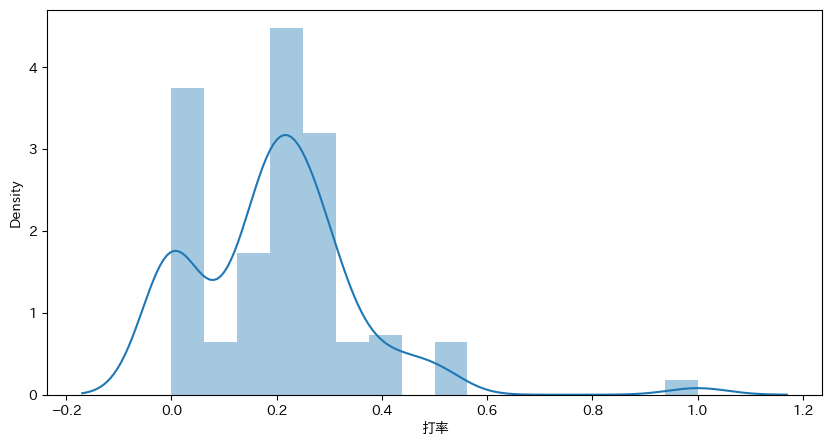

In [ ]:
# 打率の分布を確認
sns.distplot(melted['打率'])

→割と正規分布。0.2付近が一番多い

<Axes: xlabel='打率', ylabel='Count'>

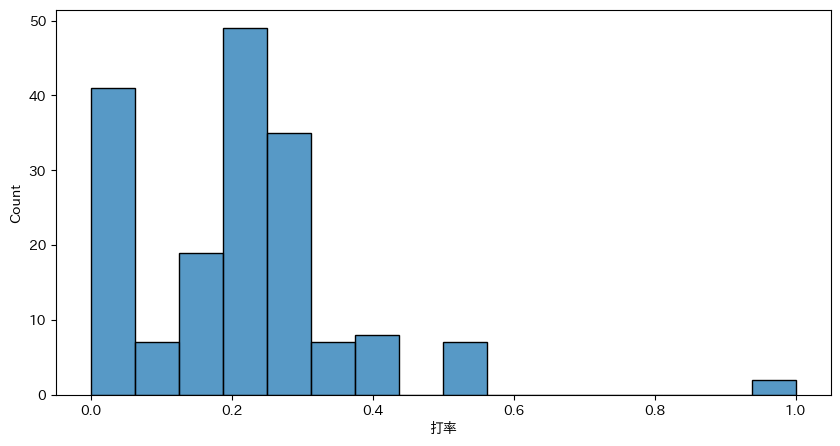

In [ ]:
# ヒストグラムで代用
sns.histplot(melted['打率'])

<Axes: >

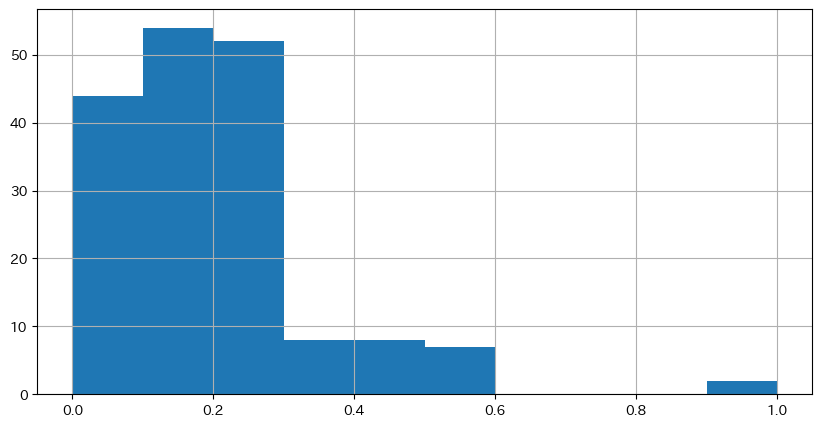

In [ ]:
# ヒストグラムで代用（Pandas）
melted['打率'].hist()

In [ ]:
# 球場ごとの平均打率
melted.groupby('球場').mean(numeric_only=True)

,打率
球場,
その他,0.135430
バンテリンドーム,0.214410
マツダスタジアム,0.174813
東京ドーム,0.225730
横浜,0.210653
甲子園,0.205047
神宮,0.213497


<Axes: xlabel='球場'>

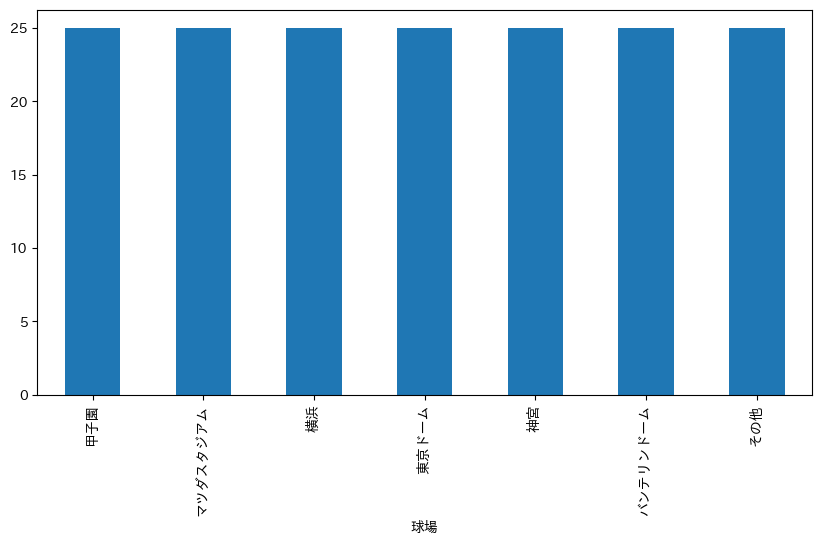

In [ ]:
# 球場ごとのデータ数を棒グラフで比較
melted['球場'].value_counts().plot(kind='bar')

<Axes: xlabel='球場', ylabel='count'>

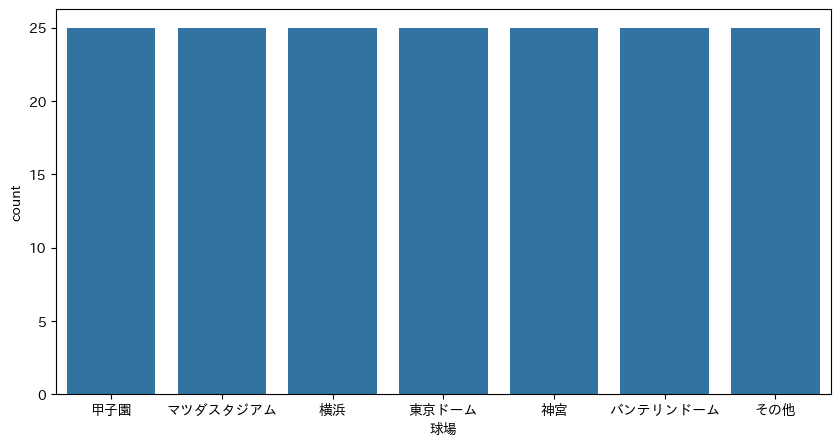

In [ ]:
# seabornを用いて同じように球場ごとのデータ数を棒グラフで可視化
sns.countplot(x='球場', data=melted)

In [ ]:
# クロス集計表を作成
pd.crosstab(melted['球場'], melted['打率'])

打率,0.000,0.083,0.091,0.095,0.100,0.105,0.111,0.125,0.136,0.143,...,0.333,0.340,0.360,0.400,0.410,0.412,0.421,0.429,0.500,1.000
球場,,,,,,,,,,,,,,,,,,,,,
その他,11,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,2,1,0
バンテリンドーム,4,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,1,0,0,2,0
マツダスタジアム,6,0,0,0,0,1,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
東京ドーム,5,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,2,1
横浜,5,0,0,0,1,0,0,1,1,0,...,0,1,0,1,0,0,1,0,2,0
甲子園,4,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
神宮,6,0,1,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,0,0,1


→あまり意味がなかった

<Axes: xlabel='球場', ylabel='打率'>

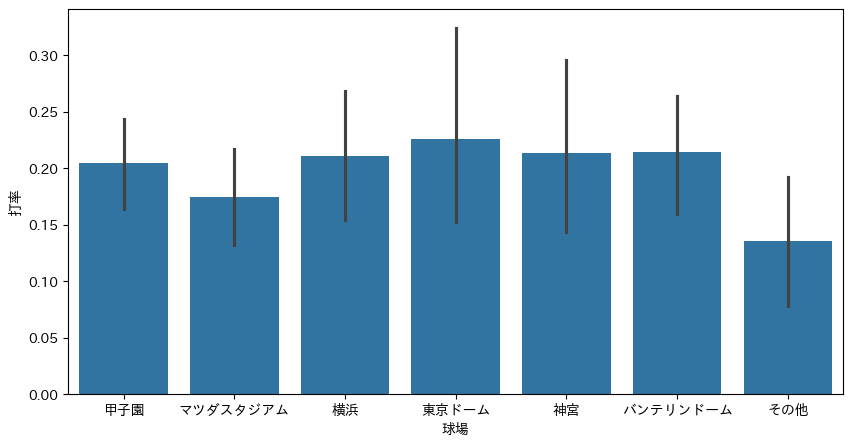

In [ ]:
# 球場ごとの平均打率を棒グラフで比較
sns.barplot(x='球場', y='打率', data=melted)

### ここまでわかったこと
 - 球場ごとに打率に差はある
 - 東京ドームや甲子園が打率がよい

## 確証的データ分析（検証）

In [ ]:
# 必要なモジュールのインポート
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 6

In [ ]:
# データの確認
melted.head()

,選手名,球場,打率
0,木浪聖也,甲子園,0.267
1,森下翔太,甲子園,0.304
2,梅野隆太郎,甲子園,0.223
3,大山悠輔,甲子園,0.281
4,熊谷敬宥,甲子園,0.000


### 仮説：球場によって打率の平均値に差がある

対応のある2標本の平均の差の検定
（例：同じ木浪選手同士での甲子園とバンテリンドームでの比較）
 - 対立仮説：球場によって打率の平均値に差がある
 - 帰無仮説：球場によって打率の平均値に差はない
 - 有意水準　α=0.05

In [ ]:
# データの確認
melted.head()

,選手名,球場,打率
0,木浪聖也,甲子園,0.267
1,森下翔太,甲子園,0.304
2,梅野隆太郎,甲子園,0.223
3,大山悠輔,甲子園,0.281
4,熊谷敬宥,甲子園,0.000


<Axes: xlabel='打率', ylabel='count'>

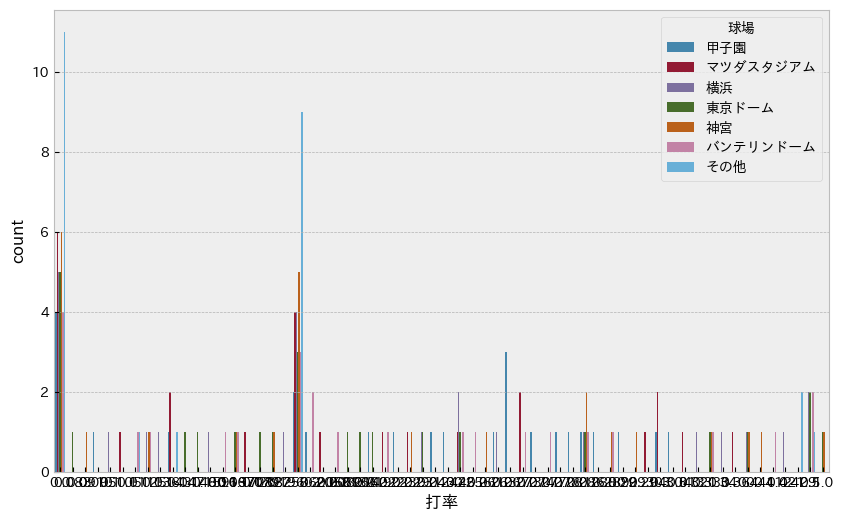

In [ ]:
# 打率と球場の集計・可視化
sns.countplot(x='打率', hue='球場', data=melted)

In [ ]:
# 球場ごとにグループ化
group = melted.groupby('球場')

# 打率の平均値を表示
group['打率'].mean()

,打率
球場,
その他,0.135430
バンテリンドーム,0.214410
マツダスタジアム,0.174813
東京ドーム,0.225730
横浜,0.210653
甲子園,0.205047
神宮,0.213497


In [ ]:
# 球場それぞれのグループを作る
jingu = group.get_group('神宮')
koshien = group.get_group('甲子園')
yokohama = group.get_group('横浜')
tokyo = group.get_group('東京ドーム')
matsuda = group.get_group('マツダスタジアム')
batente = group.get_group('バンテリンドーム')
other= group.get_group('その他')

In [ ]:
# 神宮グループを確認
tokyo.head()

,選手名,球場,打率
75,木浪聖也,東京ドーム,0.182
76,森下翔太,東京ドーム,0.219
77,梅野隆太郎,東京ドーム,0.179
78,大山悠輔,東京ドーム,0.214
79,熊谷敬宥,東京ドーム,0.000


### 統計の手順の確認
1. 正規分布を仮定できるか
2. 対応があるかないか
3. 等分散が仮定できるか

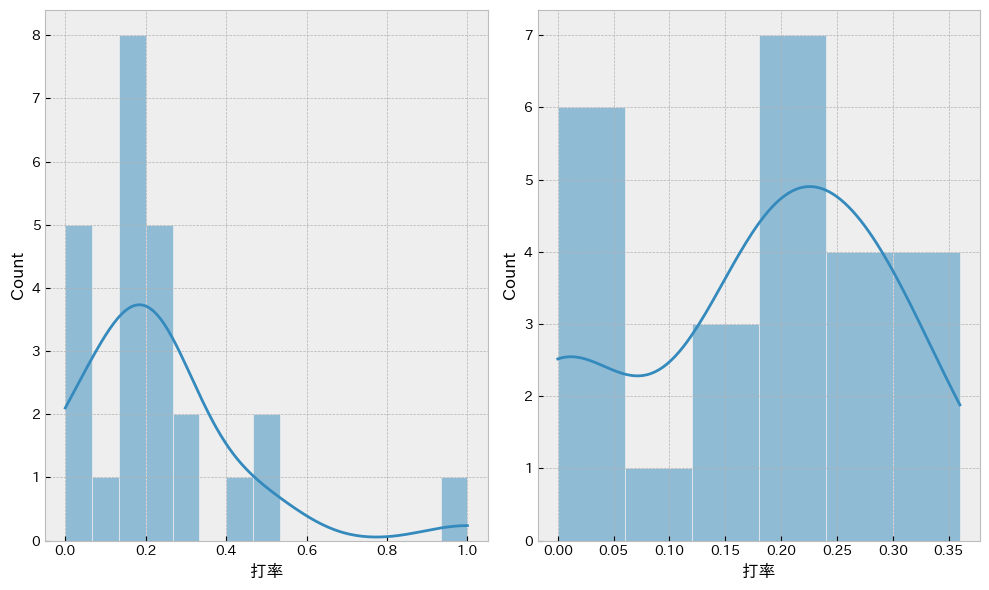

In [ ]:
# 可視化
plt.subplot(1, 2, 1)
sns.histplot(tokyo['打率'], kde=True)
plt.subplot(1, 2, 2)
sns.histplot(matsuda['打率'], kde=True)
plt.tight_layout()

In [ ]:
# サンプルサイズの確認
melted.shape

(175, 3)

In [ ]:
# サンプルサイズが小さいためシャピロ・ウィルク検定
# 東京ドーム
stat, p = stats.shapiro(tokyo['打率'])
print('統計量=%.3f, p値=%.3f' % (stat, p))

統計量=0.794, p値=0.000


In [ ]:
# マツダスタジアム
stat, p = stats.shapiro(matsuda['打率'])
print('統計量=%.3f, p値=%.3f' % (stat, p))

統計量=0.892, p値=0.013


→正規分布を仮定できない

### 平均の差を検定を実施

In [ ]:
# ウィルコクソンの符号付順位検定
stat, p = stats.wilcoxon(tokyo['打率'], matsuda['打率'])
print('統計量=%.3f, p値=%.3f' % (stat, p))

統計量=98.000, p値=0.354


 - 対立仮説：東京ドームとマツダスタジアムの打率に差がある
 - 帰無仮説：東京ドームとマツダスタジアムの打率に差はない
 今回は、
  - p値>有意水準0.05
であるため、
 - 結論：東京ドームとマツダスタジアムの打率に有意な差があるとは言えない